In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

In [2]:
#Create a set of random lat and long combos
lats=np.random.uniform(low=-90, high=90, size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#Add lats and lngs to list
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
#Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count=1
    #Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to record count
    record_count+=1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve the data
        city_weather=requests.get(city_url).json()
        #Prase out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information to the city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailaras
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | comodoro rivadavia
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | kamina
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | meulaboh
Processing Record 22 of Set 1 | amderma
City not found.

Processing Record 34 of Set 4 | anadyr
Processing Record 35 of Set 4 | puerto madryn
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | potamia
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | icod de los vinos
Processing Record 42 of Set 4 | dinsor
City not found. Skipping...
Processing Record 43 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 44 of Set 4 | goderich
Processing Record 45 of Set 4 | toora-khem
Processing Record 46 of Set 4 | mantua
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | henties bay
Processing Record 50 of Set 4 | waipawa
Processing Record 1 of Set 5 | poya
Processing Record 2 of Set 5 | mae chan
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | kozulka
Processing Record 5 of Set 5 | mehran
Processing Record 6 of Set 5 | cabo

Processing Record 22 of Set 8 | buy
Processing Record 23 of Set 8 | sabang
Processing Record 24 of Set 8 | fuerte olimpo
Processing Record 25 of Set 8 | severo-kurilsk
Processing Record 26 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 27 of Set 8 | vincennes
Processing Record 28 of Set 8 | clarence town
Processing Record 29 of Set 8 | saint-joseph
Processing Record 30 of Set 8 | la paz
Processing Record 31 of Set 8 | ayan
Processing Record 32 of Set 8 | manama
Processing Record 33 of Set 8 | xining
Processing Record 34 of Set 8 | nhulunbuy
Processing Record 35 of Set 8 | lubango
Processing Record 36 of Set 8 | porto walter
Processing Record 37 of Set 8 | gusau
Processing Record 38 of Set 8 | cukai
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | minas
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | topeka
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | el alto
Processing Record 45 of Se

Processing Record 12 of Set 12 | guerrero negro
Processing Record 13 of Set 12 | finnsnes
Processing Record 14 of Set 12 | hanzhong
Processing Record 15 of Set 12 | maketu
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | dali
Processing Record 18 of Set 12 | santiago nonualco
Processing Record 19 of Set 12 | omboue
Processing Record 20 of Set 12 | salalah
Processing Record 21 of Set 12 | alta
Processing Record 22 of Set 12 | inyonga
Processing Record 23 of Set 12 | campohermoso
Processing Record 24 of Set 12 | abrau-dyurso
Processing Record 25 of Set 12 | brownsville
Processing Record 26 of Set 12 | chone
Processing Record 27 of Set 12 | senanga
Processing Record 28 of Set 12 | bauta
Processing Record 29 of Set 12 | qui nhon
Processing Record 30 of Set 12 | noumea
Processing Record 31 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 32 of Set 12 | myitkyina
Processing Record 33 of Set 12 | caxias do sul
Processing Record 34 of Set

In [8]:
#Convert the array of dictionaries to a Pandas Dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kailaras,26.3167,77.6167,78.28,90,96,5.99,IN,2021-08-05 01:03:28
1,Mataura,-46.1927,168.8643,48.47,72,100,5.57,NZ,2021-08-05 01:03:28
2,Sorland,67.6670,12.6934,53.33,89,100,16.42,NO,2021-08-05 01:03:29
3,New Norfolk,-42.7826,147.0587,55.65,66,100,3.00,AU,2021-08-05 01:01:53
4,Comodoro Rivadavia,-45.8667,-67.5000,55.81,45,100,8.37,AR,2021-08-05 01:00:03
5,Tuktoyaktuk,69.4541,-133.0374,55.96,54,19,9.71,CA,2021-08-05 01:01:56
6,Vaini,-21.2000,-175.2000,69.17,53,97,0.81,TO,2021-08-05 01:03:29
7,Naze,28.3667,129.4833,78.67,86,19,21.25,JP,2021-08-05 01:03:30
8,Fortuna,40.5982,-124.1573,65.86,81,20,5.01,US,2021-08-05 01:03:30
9,Lompoc,34.6391,-120.4579,87.42,71,1,11.50,US,2021-08-05 01:03:30


In [9]:
#Reorder columns
new_column_order=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kailaras,IN,2021-08-05 01:03:28,26.3167,77.6167,78.28,90,96,5.99
1,Mataura,NZ,2021-08-05 01:03:28,-46.1927,168.8643,48.47,72,100,5.57
2,Sorland,NO,2021-08-05 01:03:29,67.6670,12.6934,53.33,89,100,16.42
3,New Norfolk,AU,2021-08-05 01:01:53,-42.7826,147.0587,55.65,66,100,3.00
4,Comodoro Rivadavia,AR,2021-08-05 01:00:03,-45.8667,-67.5000,55.81,45,100,8.37


In [10]:
#Create output file (CSV)
output_data_file="weather_data/cities.csv"

#Export the data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#Extract relevant fields from the DF for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

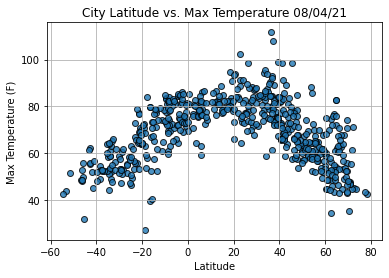

In [12]:
#Import time module
import time

#Build scatterplot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph props
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

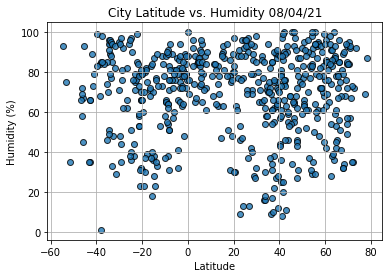

In [13]:
#Import time module
import time

#Build scatterplot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph props
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

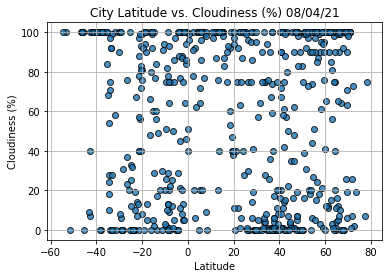

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

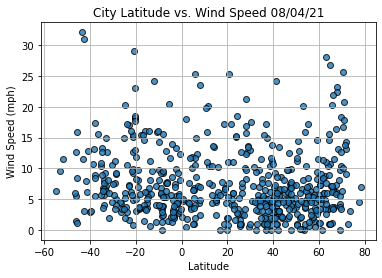

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()